<a href="https://colab.research.google.com/github/atlas-github/20190731StarMediaGroup/blob/master/fstep_20_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context

In 1953, the New York State Legislature created the New York City Transit Authority as a public corporation to oversee management and operation of the public transportation system. Now known as MTA New York City Transit, it operates the New York City subway, and local and express New York City buses alongside its sister MTA agencies the Long Island Rail Road and the Metro-North Railroad commuter rail services. The New York City subway system has the highest ridership of any subway in the US and the 7th largest in the world. It provided an average of 5.7 million weekday rides in 2015.

In this lesson, we will examine the turnstile data provided by the MTA. As we will see, **turnstile data tracks the number of entries and exits of passengers in the subway system**. However, **the number of times the turnstile records an entrance or exit does not capture the total number of passengers who use the subway**. Passengers who use one-way exit turnstiles are not counted. Passengers often use emergency exits instead of the turnstiles during peak hours or if the turnstiles are in an inconvenient location. People may also “jump the turnstiles” and enter the system without paying a fare (and using the turnstile.)

In this exercise, we shall **examine passengers entering through turnstiles** in some of the busiest and largest stations in the MTA subway system.

Side note: The MTA subway system charges one fare regardless of the distance travel. Washington DC’s Metro subway and Seattle’s light rail system charges based on the numbers of zones travels. Passengers must “tap in” when they enter the system, and “tap out” when they exit the system to determine their fare. One feature of this payment structure is that those transit systems have better data on the length and destinations of trips.

Source: [Transit Data Toolkit](http://transitdatatoolkit.com/lessons/subway-turnstile-data/)

#Extract and explore MTA data

In [5]:
#This extracts a few files from http://web.mta.info/developers/turnstile.html

!wget http://web.mta.info/developers/data/nyct/turnstile/turnstile_210130.txt
!wget http://web.mta.info/developers/data/nyct/turnstile/turnstile_210123.txt
!wget http://web.mta.info/developers/data/nyct/turnstile/turnstile_210116.txt
!wget http://web.mta.info/developers/data/nyct/turnstile/turnstile_210109.txt
!wget http://web.mta.info/developers/data/nyct/turnstile/turnstile_210102.txt

--2021-05-16 16:46:33--  http://web.mta.info/developers/data/nyct/turnstile/turnstile_210130.txt
Resolving web.mta.info (web.mta.info)... 23.35.70.80, 23.35.70.65
Connecting to web.mta.info (web.mta.info)|23.35.70.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘turnstile_210130.txt’

turnstile_210130.tx     [  <=>               ]  26.10M  86.1MB/s    in 0.3s    

2021-05-16 16:46:33 (86.1 MB/s) - ‘turnstile_210130.txt’ saved [27367996]

--2021-05-16 16:46:33--  http://web.mta.info/developers/data/nyct/turnstile/turnstile_210123.txt
Resolving web.mta.info (web.mta.info)... 23.35.70.80, 23.35.70.65
Connecting to web.mta.info (web.mta.info)|23.35.70.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘turnstile_210123.txt’

turnstile_210123.tx     [  <=>               ]  26.09M   101MB/s    in 0.3s    

2021-05-16 16:46:34 (101 MB/s) - ‘turnstile_210123.txt’ saved [

In [29]:
import pandas as pd

df5 = pd.read_csv('turnstile_210130.txt', delimiter = ",")
df4 = pd.read_csv('turnstile_210123.txt', delimiter = ",")
df3 = pd.read_csv('turnstile_210116.txt', delimiter = ",")
df2 = pd.read_csv('turnstile_210109.txt', delimiter = ",")
df1 = pd.read_csv('turnstile_210102.txt', delimiter = ",")

df0 = df1[df1.DATE.str.startswith("01")]

In [30]:
df = pd.concat([df0, df2, df3, df4, df5], ignore_index = True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,2558786
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857
...,...,...,...,...,...,...,...,...,...,...,...
868498,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,04:00:00,REGULAR,5554,544
868499,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,08:00:00,REGULAR,5554,544
868500,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,12:00:00,REGULAR,5554,544
868501,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,16:00:00,REGULAR,5554,544


C/A – The Control Area is the operator booth in a station. Some stations only have one operator booth. However, larger stations may have more than one.

UNIT – The Remote Unit, which is the collection of turnstiles. A station may have more than one Remote Unit.

SCP – The Subunit Channel Position represents the turnstile and the number used may repeat across stations. The UNIT and SCP together is a unique identifier of a turnstile.

DATE – The Date is the date of the recording with the format MM/DD/YYYY.

TIME – The Time is the time for a recording, with the format: HH:MM:SS.

DESC – The DESC is the type of event of the reading. The turnstiles submit “Regular” readings every four hours. They stagger the exact time of the readings across all the turnstiles and stations. Staggering the data submission times avoids having all the turnstiles update at simultaneously. “Recover Audit” designates scheduled readings taken after a communication outage. Our analysis uses “Regular” and “Recover Audit” readings. We discard other values such as “DoorClose” and “DoorOpen” which represent unscheduled maintenance readings.

ENTRIES = The ENTRIES are a cumulative count of turnstile entrances. Note, the ENTRIES do not reset each day or for each recording period. The turnstile entry count continues to increase until it reaches the device limit and then resets to zero.

EXITS = The EXITS are a cumulative count of the turnstile exits.

#Prepare data

In [50]:
#Rename C/A column to BOOTH
df_new = df.rename(columns = {"C/A": "BOOTH"})
df_new

#Keep only Regular and Recovery Audit readings
df_filter = df_new.loc[df_new['DESC'].isin(['REGULAR','RECOVR AUD'])]
df_filter

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,2558786
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857
...,...,...,...,...,...,...,...,...,...,...,...
868498,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,04:00:00,REGULAR,5554,544
868499,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,08:00:00,REGULAR,5554,544
868500,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,12:00:00,REGULAR,5554,544
868501,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,16:00:00,REGULAR,5554,544


In the turnstile `dataframe`, look at the `Entries` and `Exits` columns.
The turnstiles record each time a passenger enters and exits through it. Every four hours, they send a time-stamped running tally of the entries and exits. The data shows that the tally increases with every reading. The turnstiles reset when their counters reach their maximum limit. To determine how many people enter through a turnstile, we subtract the previous time stamped `Entries` reading with the current number of `Entries`.

In [52]:
df_filter['diff'] = df_filter.groupby(["BOOTH", "SCP"]).ENTRIES.diff()
df_filter

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,2558786,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813,10.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831,34.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...
868498,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,04:00:00,REGULAR,5554,544,0.0
868499,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,08:00:00,REGULAR,5554,544,0.0
868500,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,12:00:00,REGULAR,5554,544,0.0
868501,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,16:00:00,REGULAR,5554,544,0.0


We now have the number of passengers entering and exiting a turnstile over each time interval. However, on occasion, there might be a negative number of passengers. Outages in the transmission, lapses in communication between the turnstile and the MTA backend servers, and maintenance on the turnstile cause these readings.

In [53]:
df_filter = df_filter[df_filter["diff"] > 0]
df_filter

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,diff
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813,10.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831,34.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857,125.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,23:00:00,REGULAR,7511647,2558865,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
868381,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/23/2021,16:00:00,REGULAR,3133526,397446,1.0
868399,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/26/2021,16:00:00,REGULAR,3133531,397447,5.0
868410,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/28/2021,12:00:00,REGULAR,3133532,397447,1.0
868440,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,01/26/2021,12:00:00,REGULAR,3208,62,1.0


Four major stations of the subway system are `34th St Penn Station`, `42nd St Port Authority`, `42th St Grand Central`, and `Atlantic Avenue Barclay`. These are some of the busiest stations in the system, with connections to other various modes of transit such as Amtrak, Long Island Railroad, MTA Metro North regional trains, and regional bus service. Let’s compare the ridership of these stations.

In [54]:
df_stn = df_filter[(df_filter['STATION'] == "34 ST-PENN STA") | (df_filter['STATION'] == "42 ST-PORT AUTH") | 
                   (df_filter['STATION'] == "GRD CNTRL-42 ST") | (df_filter['STATION'] == "ATL AV-BARCLAY")]
df_stn

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,diff
3010,C009,R057,03-00-00,ATL AV-BARCLAY,BDNQR2345,BMT,01/01/2021,07:00:00,REGULAR,644823,1374204,8.0
3011,C009,R057,03-00-00,ATL AV-BARCLAY,BDNQR2345,BMT,01/01/2021,11:00:00,REGULAR,644868,1374306,45.0
3012,C009,R057,03-00-00,ATL AV-BARCLAY,BDNQR2345,BMT,01/01/2021,15:00:00,REGULAR,644967,1374443,99.0
3013,C009,R057,03-00-00,ATL AV-BARCLAY,BDNQR2345,BMT,01/01/2021,19:00:00,REGULAR,645075,1374608,108.0
3014,C009,R057,03-00-00,ATL AV-BARCLAY,BDNQR2345,BMT,01/01/2021,23:00:00,REGULAR,645139,1374704,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859857,R612,R057,01-05-00,ATL AV-BARCLAY,BDNQR2345,IRT,01/23/2021,15:00:00,REGULAR,50346089,134263112,1.0
859859,R612,R057,01-05-00,ATL AV-BARCLAY,BDNQR2345,IRT,01/23/2021,23:00:00,REGULAR,50346090,134263112,1.0
859868,R612,R057,01-05-00,ATL AV-BARCLAY,BDNQR2345,IRT,01/25/2021,11:00:00,REGULAR,50346091,134263112,1.0
859876,R612,R057,01-05-00,ATL AV-BARCLAY,BDNQR2345,IRT,01/26/2021,19:00:00,REGULAR,50346092,134263112,1.0


Then we calculate the Entries by our four stations and day. The `sum` function groups all our data into subsets and produces summary statistics on each subset. 

In [60]:
stations_four = df_stn.groupby(["STATION", "DATE"])[["diff"]].sum().reset_index()
stations_four

,STATION,DATE,diff
0,34 ST-PENN STA,01/01/2021,11298.0
1,34 ST-PENN STA,01/02/2021,18417.0
2,34 ST-PENN STA,01/03/2021,13158.0
3,34 ST-PENN STA,01/04/2021,30977.0
4,34 ST-PENN STA,01/05/2021,31119.0
...,...,...,...
111,GRD CNTRL-42 ST,01/25/2021,22358.0
112,GRD CNTRL-42 ST,01/26/2021,23018.0
113,GRD CNTRL-42 ST,01/27/2021,23726.0
114,GRD CNTRL-42 ST,01/28/2021,23864.0


#Create charts using Seaborn

A line chart is a useful when comparing numeric values across time. We will use it to compare each station’s daily entries.

Text(0.5, 1.0, 'MTA Subway Daily Turnstile Entries, Jan 2021')

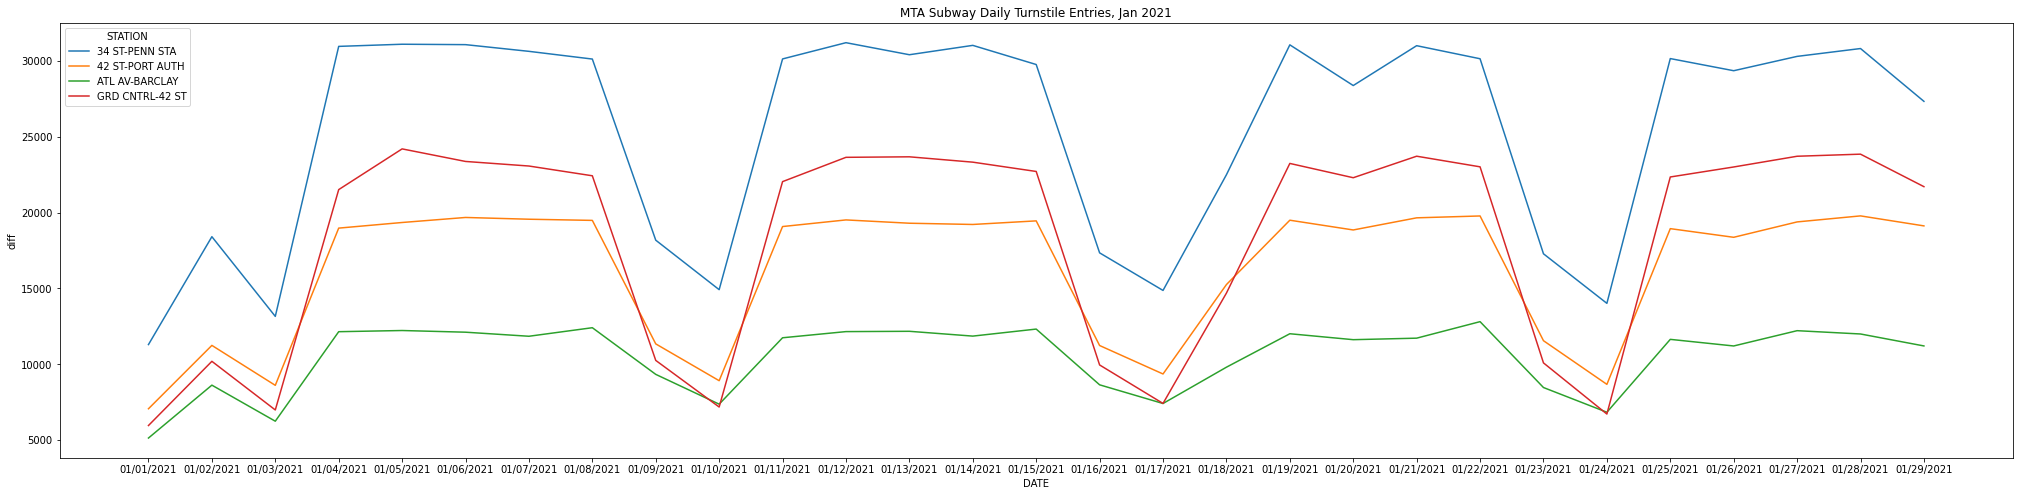

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 8))
sns.lineplot(data = stations_four, x = "DATE", y = "diff", hue = "STATION").set_title("MTA Subway Daily Turnstile Entries, Jan 2021")

#Exercise

Using `df_stn`, use Seaborn's [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) to find the number of passengers for each station.

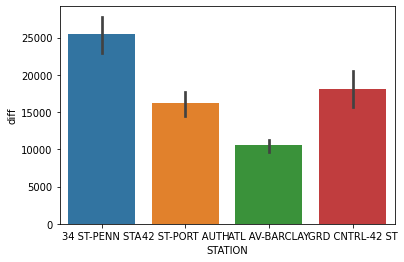

In [117]:
sns.barplot(x = "STATION", y = "diff", data = stations_four)

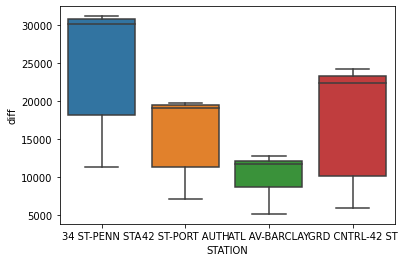

In [116]:
sns.boxplot(x = "STATION", y = "diff", data = stations_four)

In [104]:
!wget http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls

--2021-05-16 19:00:59--  http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls
Resolving web.mta.info (web.mta.info)... 23.35.70.65, 23.35.70.80
Connecting to web.mta.info (web.mta.info)|23.35.70.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.ms-excel]
Saving to: ‘Remote-Booth-Station.xls’

Remote-Booth-Statio     [ <=>                ] 106.00K  --.-KB/s    in 0.01s   

2021-05-16 19:00:59 (8.63 MB/s) - ‘Remote-Booth-Station.xls’ saved [108544]



In [106]:
stations = pd.read_excel("Remote-Booth-Station.xls")
stations

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT
...,...,...,...,...,...
763,R549,PTH20,NEWARK HM HE,1,PTH
764,R550,PTH07,CITY / BUS,1,PTH
765,R550,PTH16,LACKAWANNA,1,PTH
766,R551,PTH04,GROVE STREET,1,PTH


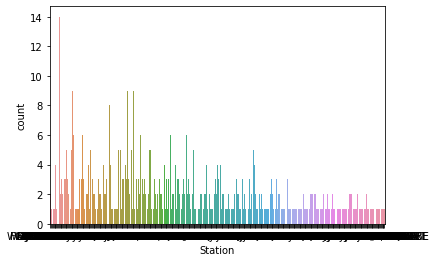

In [128]:
sns.countplot(x = "Station", data = stations)